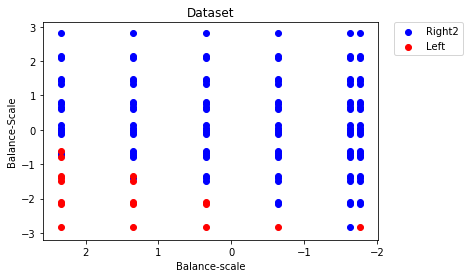

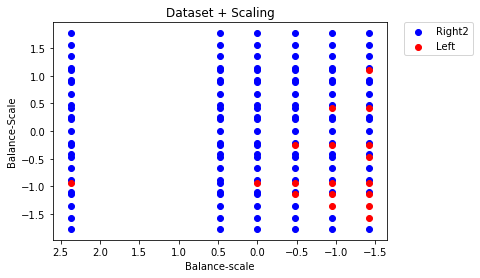

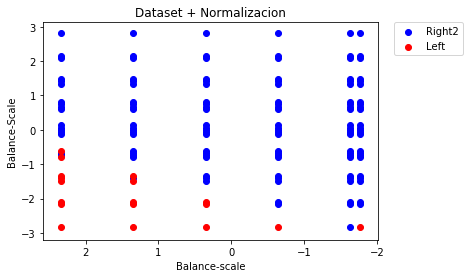

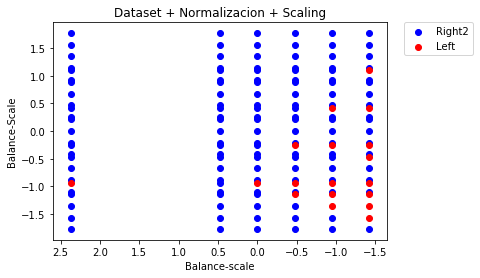

In [1]:
import pandas as pd
import string
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import asarray

#obtener los datos crudos desde el archivo .csv
datasets = pd.read_csv("balanceScale.csv", header=None)

matrixWith2Etiquetas = [[0 for x in range(datasets.shape[1])] for y in range(datasets.shape[0])]
matrixSinEtiqueta = [[0 for x in range(datasets.shape[1]-1)] for y in range(150)] 
targets = [0 for x in range(150)] 

for i in range(datasets.shape[0]):
    for j in range(datasets.shape[1]):
        dato = datasets.get_value(i,j)
        if(dato == 'B'):
            matrixWith2Etiquetas[i][j] = 'R'
        elif(dato != 'B'):
            matrixWith2Etiquetas[i][j] = dato
matrixWith2Etiquetas = pd.DataFrame(matrixWith2Etiquetas)
#print matrixWith2Etiquetas

for k in range(150):
    b=0
    for l in range(1,matrixWith2Etiquetas.shape[1]):
        matrixSinEtiqueta[k][b] = matrixWith2Etiquetas.get_value(k,l) 
        b=b+1
matrixSinEtiqueta = pd.DataFrame(matrixSinEtiqueta)        
#print matrixSinEtiqueta
        
def caseTF(value):
    return {
        "R": 0,
        "L": 1
    }.get(value,3)

for i in range(150):
    targets[i] = caseTF(matrixWith2Etiquetas.get_value(i,0))
#print targets
#0 - Right
#1 - Left
#reduccion a dos columnas por pca
pca = PCA(n_components=2)
#redcir
PCA_reduced = pca.fit_transform(matrixSinEtiqueta)
#imprimir reduce_data_pca
%matplotlib inline

arrayNombres = ["" for x in range(0,2)]
arrayNombres[0]= 'Right2'
arrayNombres[1]= 'Left'

#Array con colores respectivos para las etiquetas
colors=["blue","red"]
 
targets = asarray(targets)

#Graficar
for i in range(len(colors)):
    x = PCA_reduced[:, 0][targets == i]
    y = PCA_reduced[:, 1][targets == i]
    plt.scatter(x, y, c=colors[i])
    plt.legend(arrayNombres, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Balance-scale')
    plt.ylabel('Balance-Scale')
    plt.title("Dataset")
plt.gca().invert_xaxis()
plt.show() 

X_scaled = preprocessing.scale(matrixSinEtiqueta)
pca = PCA(n_components=2)
PCA_reduced = pca.fit_transform(X_scaled)
#Graficar
for i in range(len(colors)):
    x = PCA_reduced[:, 0][targets == i]
    y = PCA_reduced[:, 1][targets == i]
    plt.scatter(x, y, c=colors[i])
    plt.legend(arrayNombres, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Balance-scale')
    plt.ylabel('Balance-Scale')
    plt.title("Dataset + Scaling")
plt.gca().invert_xaxis()
plt.show() 

normalized_data = normalize(matrixSinEtiqueta)
pca = PCA(n_components=2)
PCA_reduced = pca.fit_transform(matrixSinEtiqueta)
#Graficar
for i in range(len(colors)):
    x = PCA_reduced[:, 0][targets == i]
    y = PCA_reduced[:, 1][targets == i]
    plt.scatter(x, y, c=colors[i])
    plt.legend(arrayNombres, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Balance-scale')
    plt.ylabel('Balance-Scale')
    plt.title("Dataset + Normalizacion")
plt.gca().invert_xaxis()
plt.show() 

X_scaled = preprocessing.scale(matrixSinEtiqueta)
normalized_data = normalize(X_scaled)
pca = PCA(n_components=2)
PCA_reduced = pca.fit_transform(X_scaled)
#Graficar
for i in range(len(colors)):
    x = PCA_reduced[:, 0][targets == i]
    y = PCA_reduced[:, 1][targets == i]
    plt.scatter(x, y, c=colors[i])
    plt.legend(arrayNombres, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Balance-scale')
    plt.ylabel('Balance-Scale')
    plt.title("Dataset + Normalizacion + Scaling")
plt.gca().invert_xaxis()
plt.show() 

In [2]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class ourEstimator(BaseEstimator):
    dataset = []
    target = []
    probPosi = 0.0
    tn = []
    P = -1
    
    def __init__(self, targets_name):
        self.tn = targets_name

    def fit(self, X, y):
        self.dataset = pd.DataFrame(X)
        self.P= 1 #C es la etiqueta positiva 
        n=0.0
        for r in range(0, len(y)):
            if y[r]== self.P:
                n=n+1.0
        self.probPosi= n / len(y) #Probabilidad de la etiqueta positiva
        self.target=y
        return self

    def predict_proba(self, X):
        X= pd.DataFrame(X)
        #Calcula cuál es la probabilidad de que a cada fila le quede la etiqueta positiva
        probFinales = [0.0 for i in range(X.shape[0] )] #probabilidades para cada fila del dataset de prueba
        pColumnas = [0.0 for i in range(self.dataset.shape[1])] #array del tamaño de cantidad de columnas del dataset de prueba
        for i in range(0, X.shape[0] ): 
            pos=0.0
            for k in range(0, self.dataset.shape[0]):
                if(self.target[k] == self.P):
                    for x in range(0, self.dataset.shape[1]):
                        if(X.loc[i,x] == self.dataset.loc[k,x]):
                            pColumnas[x] = pColumnas[x] + 1.0
                    pos=pos+1.0
            #multiplicar todas las probabilidades de las columnas por la de la etiqueta
            suma=1.0
            for m in range(0, self.dataset.shape[1]):
                if(pos==0):
                    pColumnas[m]=0
                else:
                    pColumnas[m] = pColumnas[m] / pos
                suma = suma * pColumnas[m]
            probFinales[i] = suma * self.probPosi
        return probFinales
        

In [1]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = matrixSinEtiqueta
y = targets
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 0 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
#classifier = svm.SVC(kernel='linear', probability=True,
 #                    random_state=random_state)
classifier = ourEstimator(arrayNombres)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bayes')
plt.legend(loc="lower right")
plt.show()

NameError: name 'matrixSinEtiqueta' is not defined

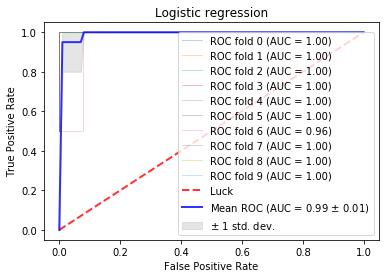

In [4]:
# #############################################################################
# Data IO and generation

from sklearn.linear_model import LogisticRegression

# Import some data to play with
X = matrixSinEtiqueta
y = targets
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 0 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression')
plt.legend(loc="lower right")
plt.show()

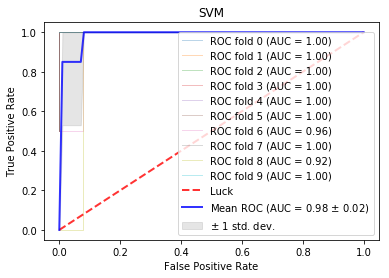

In [5]:
# #############################################################################
# Data IO and generation

# Import some data to play with
X = matrixSinEtiqueta
y = targets
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 0 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend(loc="lower right")
plt.show()